In [3]:
%pip install seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('./dataset_for_assignment2.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   User ID                  5000 non-null   int64 
 1   Gender                   5000 non-null   object
 2   Age                      5000 non-null   int64 
 3   Activity Level           5000 non-null   object
 4   Location                 5000 non-null   object
 5   App Sessions             5000 non-null   int64 
 6   Distance Travelled (km)  5000 non-null   int64 
 7   Calories Burned          5000 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 254.0+ KB


In [7]:
# data checking, to check for missing values
df.isnull().sum()

User ID                    0
Gender                     0
Age                        0
Activity Level             0
Location                   0
App Sessions               0
Distance Travelled (km)    0
Calories Burned            0
dtype: int64

In [ ]:
# Display unique values and their counts for categorical variables
categorical_cols = ['Gender', 'Activity Level', 'Location']
for col in categorical_cols:
    print(f"Unique values and counts for {col}:")
    print(df[col].value_counts())

In [36]:
# Calculate average metrics by user characteristics
print("Average metrics by Gender:")
print(df.groupby('Gender')[['App Sessions', 'Distance Travelled (km)', 'Calories Burned']].mean())

print("Average metrics by Activity Level:")
print(df.groupby('Activity Level')[['App Sessions', 'Distance Travelled (km)', 'Calories Burned']].mean())

print("Average metrics by Location:")
print(df.groupby('Location')[['App Sessions', 'Distance Travelled (km)', 'Calories Burned']].mean())

Average metrics by Gender:
        App Sessions  Distance Travelled (km)  Calories Burned
Gender                                                        
Female    124.619009                92.508530       434.103574
Male      124.121355                92.591017       430.581954
Average metrics by Activity Level:
                App Sessions  Distance Travelled (km)  Calories Burned
Activity Level                                                        
Active            174.202819               129.253064       605.996936
Moderate          124.159746                92.554210       432.080161
Sedentary          74.810282                55.888617       259.097919
Average metrics by Location:
          App Sessions  Distance Travelled (km)  Calories Burned
Location                                                        
Rural       124.311164                92.578979       436.085511
Suburban    123.029797                91.231228       425.939809
Urban       125.792430                93.8

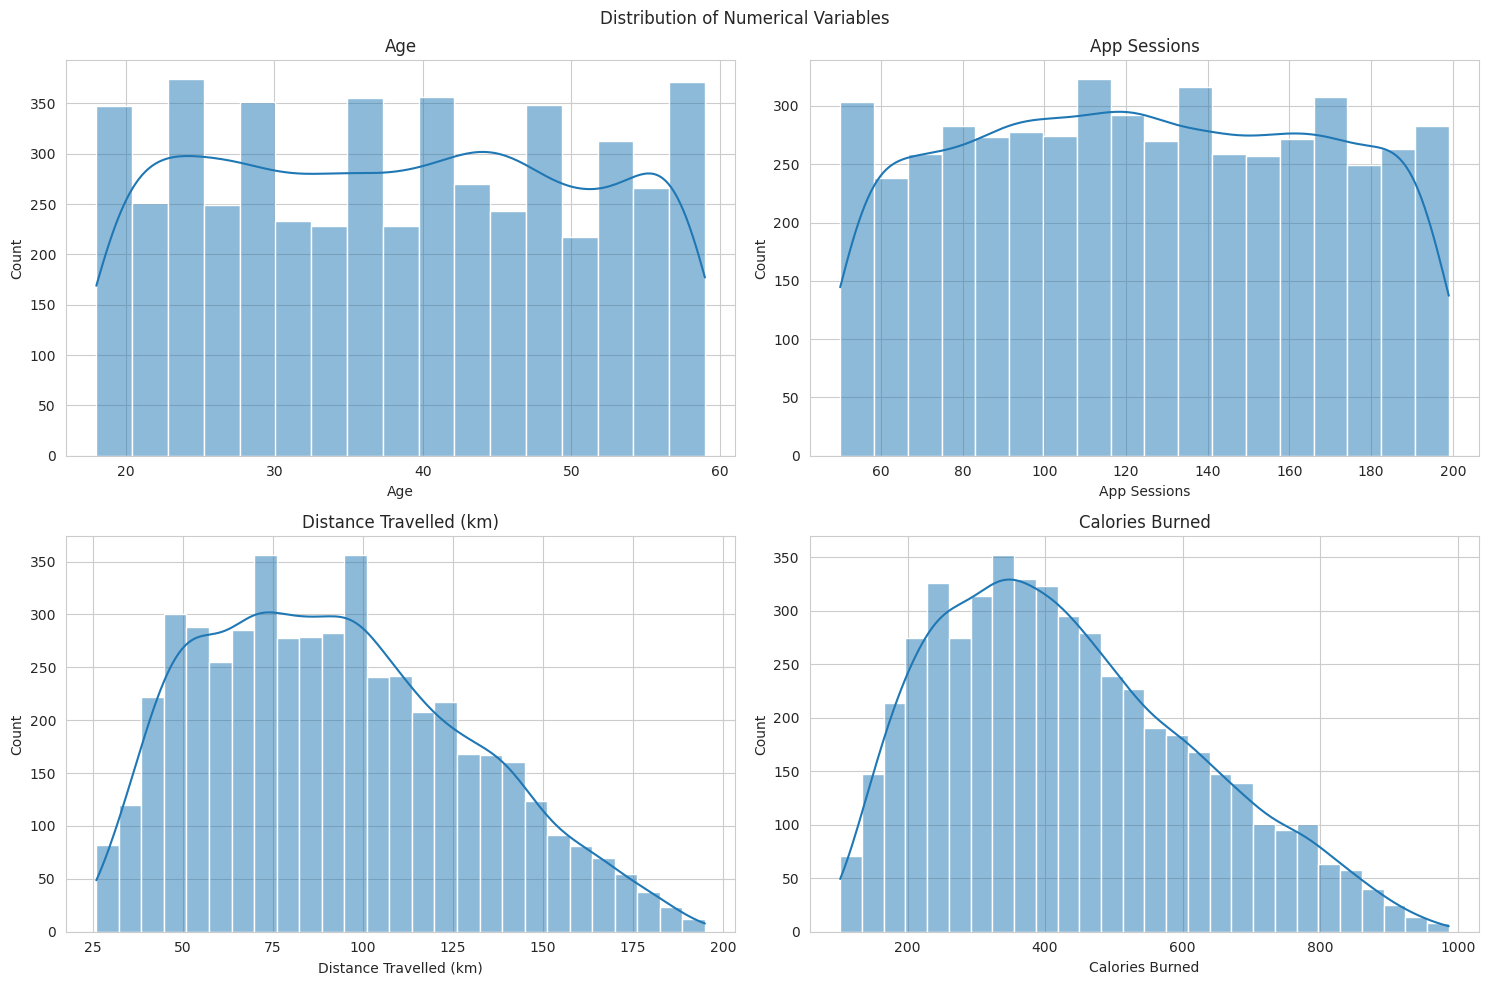

In [31]:
# Create histograms for numerical variables
numerical_cols = ['Age', 'App Sessions', 'Distance Travelled (km)', 'Calories Burned']
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distribution of Numerical Variables')

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], ax=axes[i//2, i%2], kde=True)
    axes[i//2, i%2].set_title(col)

plt.tight_layout()
plt.show()

In [11]:
# Create new features
df['Avg_Distance_Per_Session'] = df['Distance Travelled (km)'] / df['App Sessions']
df['Avg_Calories_Per_Session'] = df['Calories Burned'] / df['App Sessions']
# Display the first few rows with the new features
df.head()

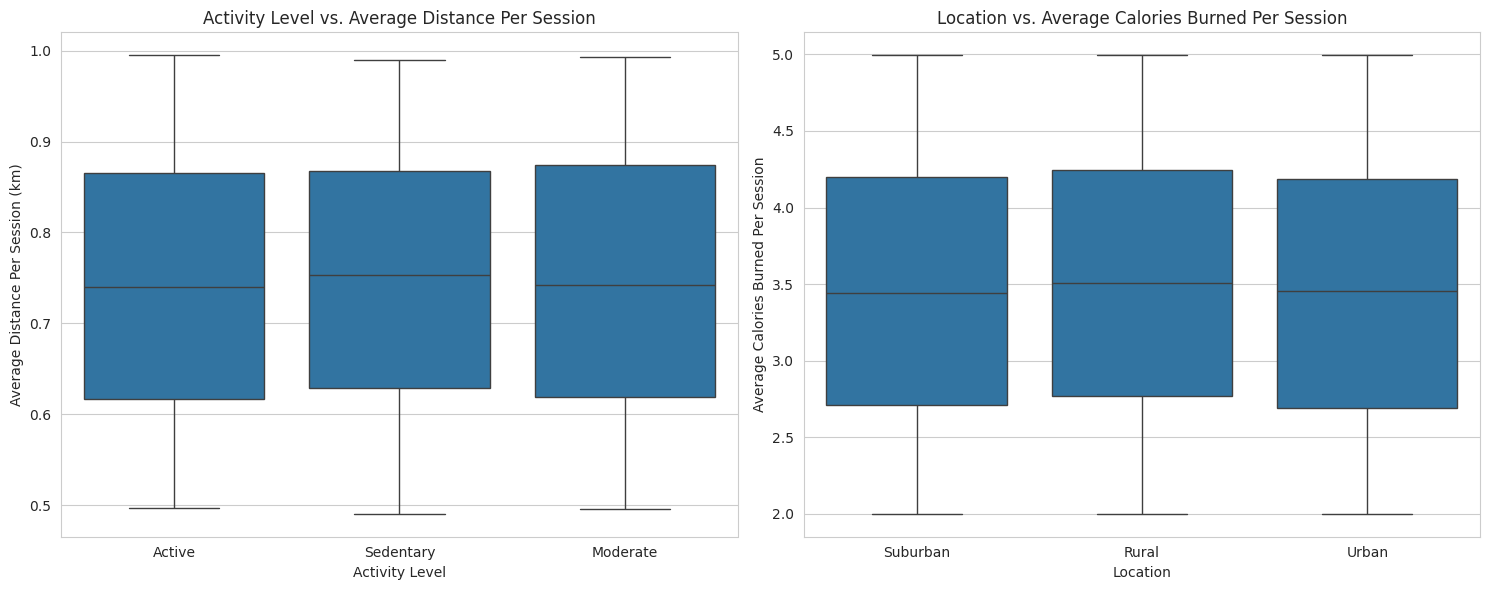

In [38]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")
plt.figure(figsize=(15, 6))
# Plot the relationship between activity level and average distance per session
plt.subplot(1, 2, 1)
sns.boxplot(x='Activity Level', y='Avg_Distance_Per_Session', data=df)
plt.title('Activity Level vs. Average Distance Per Session')
plt.xlabel('Activity Level')
plt.ylabel('Average Distance Per Session (km)')

# Plot the relationship between location and average calories burned per session
plt.subplot(1, 2, 2)
sns.boxplot(x='Location', y='Avg_Calories_Per_Session', data=df)
plt.title('Location vs. Average Calories Burned Per Session')
plt.xlabel('Location')
plt.ylabel('Average Calories Burned Per Session')

plt.tight_layout()
plt.show()

<ipython-input-39-829ead10fc26>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


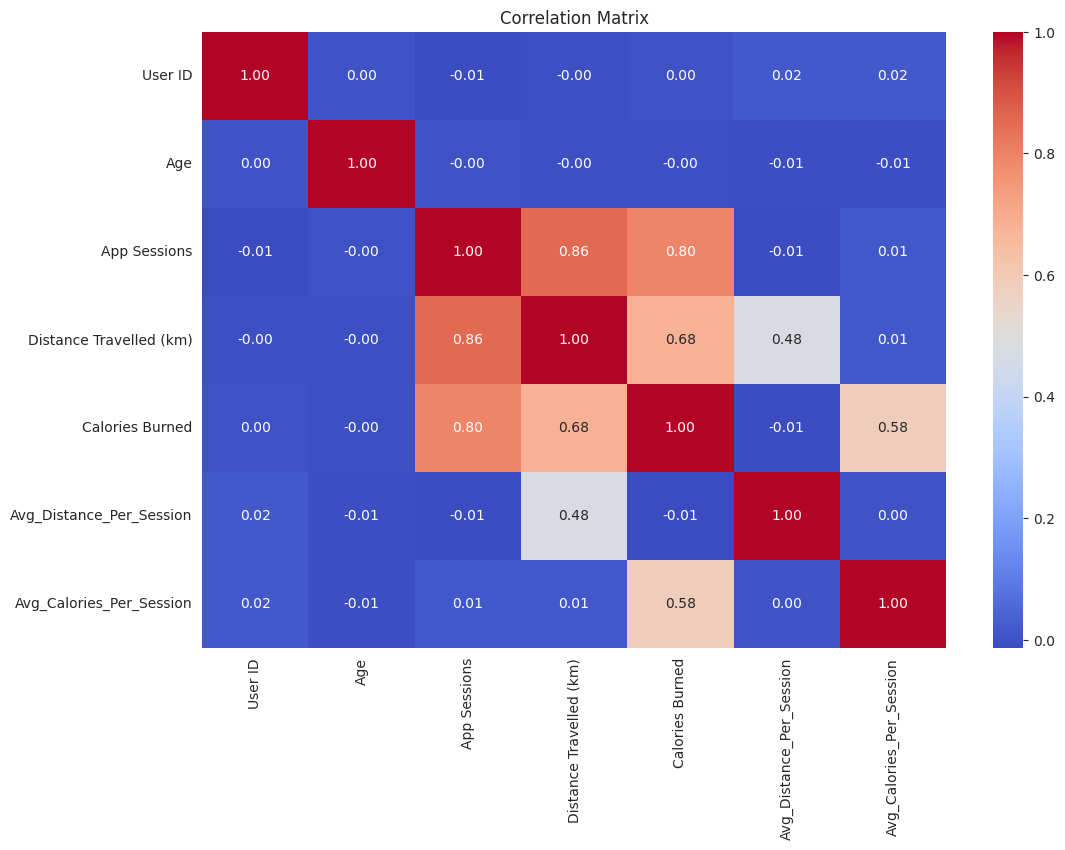

In [39]:
# Compute the correlation matrix
corr_matrix = df.corr()
# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Example insights and recommendations
# - Users with higher activity levels tend to have more app sessions and higher average distances per session.
# - There is a positive correlation between age and app sessions, indicating that older users may use the app more frequently.
# - Users in urban areas tend to burn more calories per session compared to those in rural areas.

# Example recommendations
# - Introduce personalized challenges or goals based on user activity levels to increase engagement.
# - Provide tailored content or notifications for older users to maintain their engagement.
# - Develop location-based features or events to encourage users in rural areas to be more active.

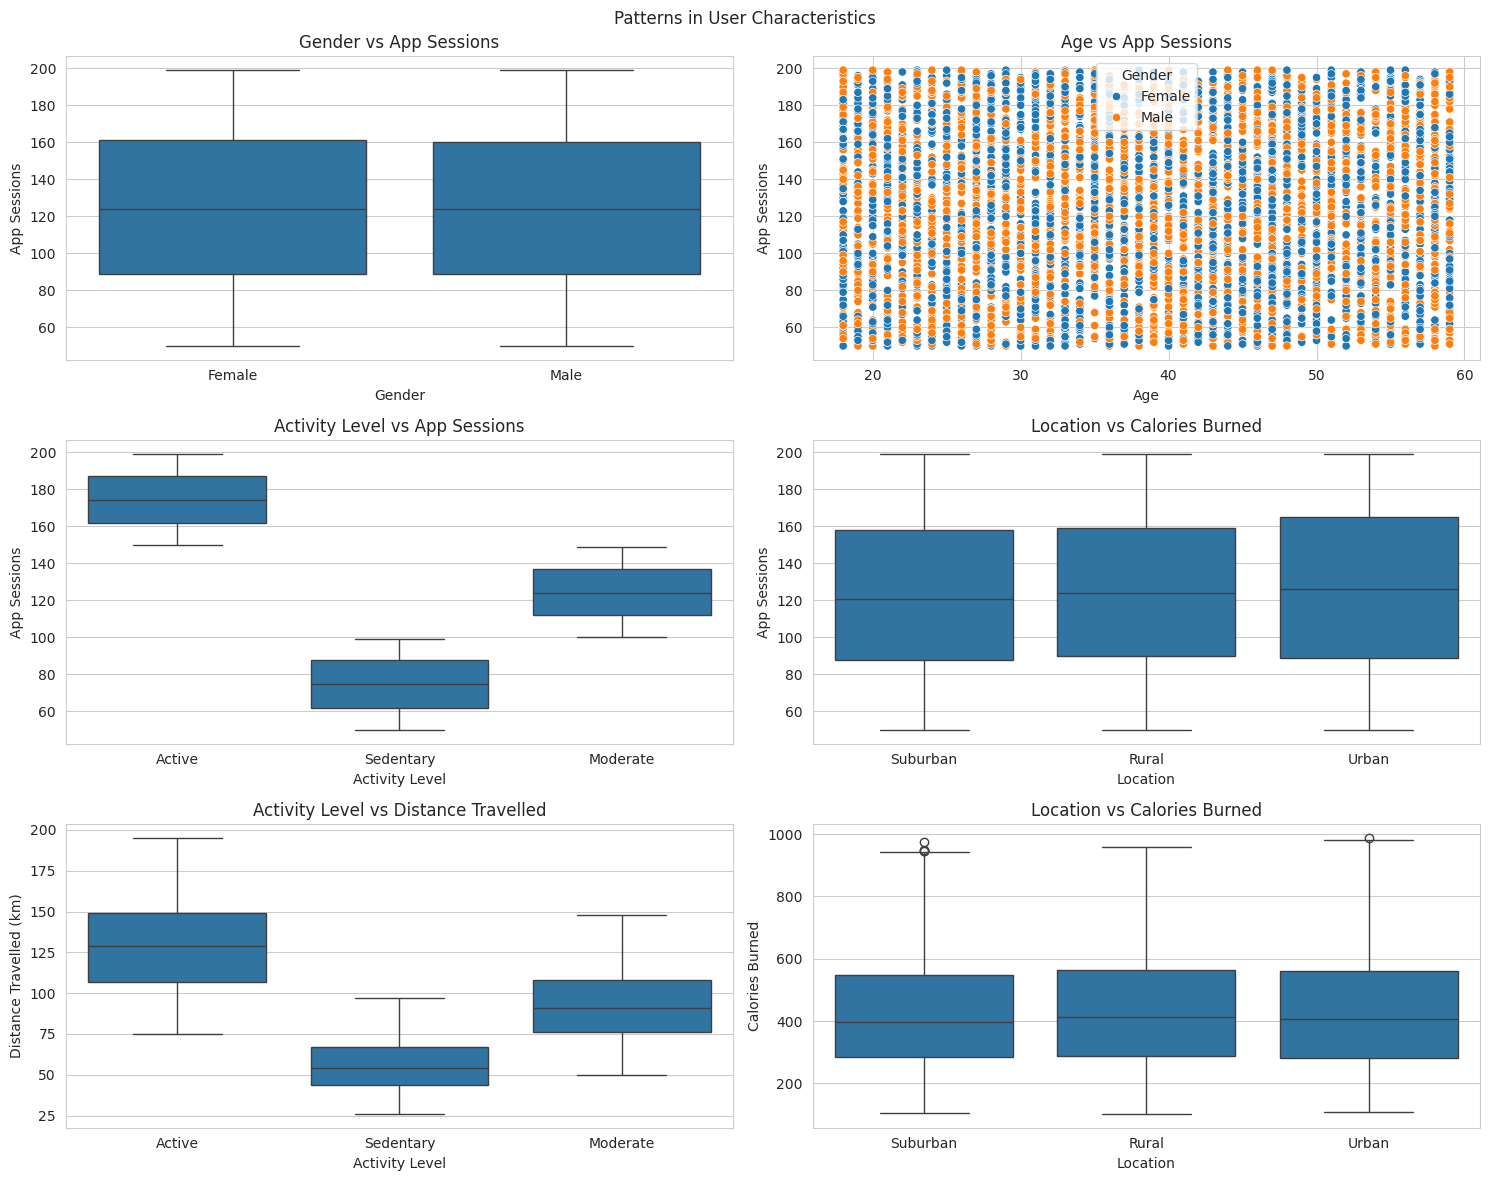

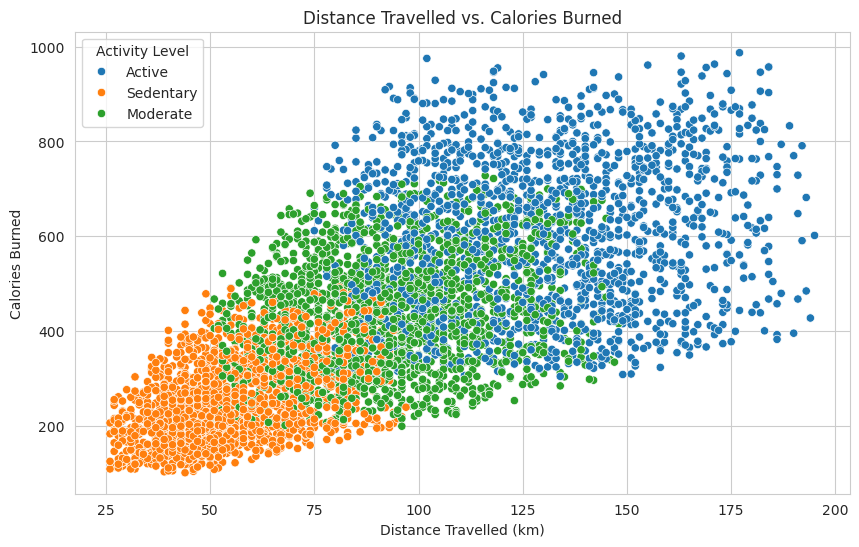

In [33]:
# Analyze patterns based on user characteristics
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
fig.suptitle('Patterns in User Characteristics')

# Gender vs App Sessions  # Analyzing user engagement by gender
sns.boxplot(x='Gender', y='App Sessions', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Gender vs App Sessions')

# Age vs App Sessions
sns.scatterplot(x='Age', y='App Sessions', hue='Gender', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Age vs App Sessions')


# Activity Level vs App Sessions
sns.boxplot(x='Activity Level', y='App Sessions', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Activity Level vs App Sessions')

# Location vs App Sessions
sns.boxplot(x='Location', y='App Sessions', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Location vs Calories Burned')

# Activity Level vs Distance Travelled
sns.boxplot(x='Activity Level', y='Distance Travelled (km)', data=df, ax=axes[2, 0])
axes[2, 0].set_title('Activity Level vs Distance Travelled')

# Location vs Calories Burned
sns.boxplot(x='Location', y='Calories Burned', data=df, ax=axes[2, 1])
axes[2, 1].set_title('Location vs Calories Burned')

plt.tight_layout()
plt.show()


# Scatter plot to see the relationship between Distance Travelled and Calories Burned
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Distance Travelled (km)', y='Calories Burned', hue='Activity Level', data=df)
plt.title('Distance Travelled vs. Calories Burned')
plt.xlabel('Distance Travelled (km)')
plt.ylabel('Calories Burned')
plt.show()

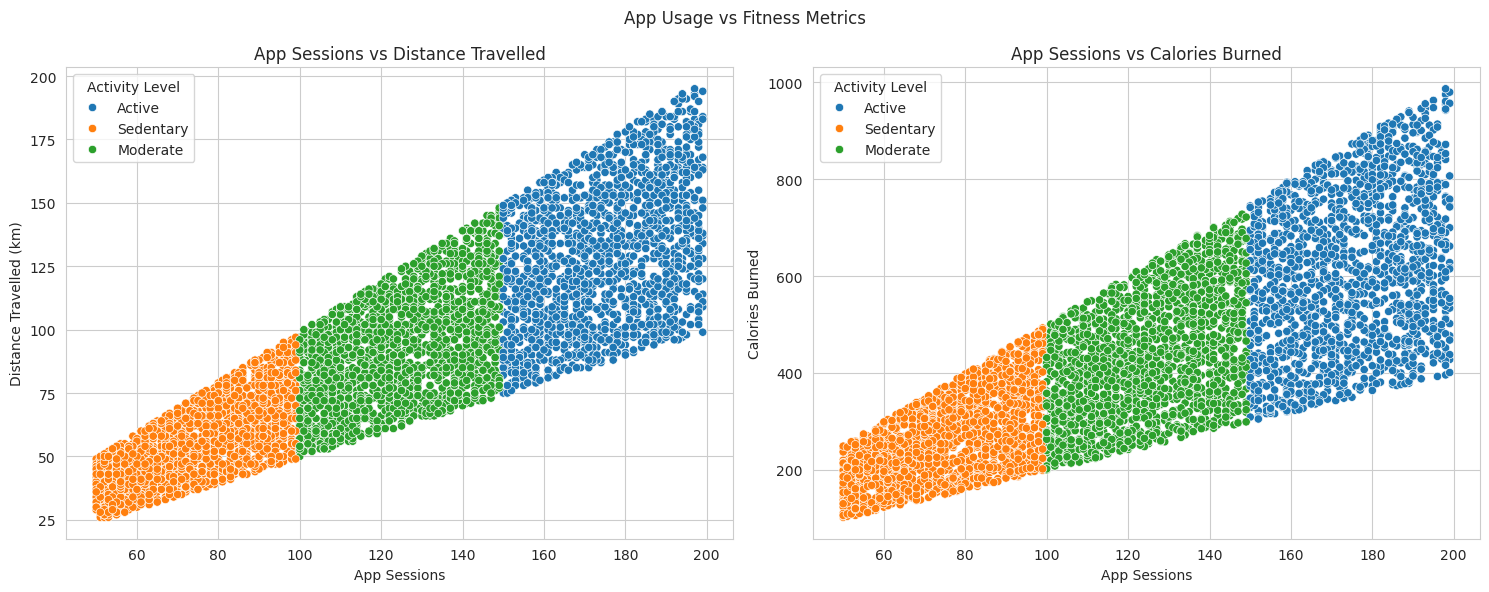

In [23]:
# Analyze relationships between app usage and fitness metrics
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('App Usage vs Fitness Metrics')

sns.scatterplot(x='App Sessions', y='Distance Travelled (km)', hue='Activity Level', data=df, ax=axes[0])
axes[0].set_title('App Sessions vs Distance Travelled')

sns.scatterplot(x='App Sessions', y='Calories Burned', hue='Activity Level', data=df, ax=axes[1])
axes[1].set_title('App Sessions vs Calories Burned')

plt.tight_layout()
plt.show()


In [40]:


# Define engagement levels based on app sessions
df['Engagement Level'] = pd.cut(df['App Sessions'], 
                                bins=[0, 50, 100, 150, float('inf')],
                                labels=['Low', 'Medium', 'High', 'Very High'])

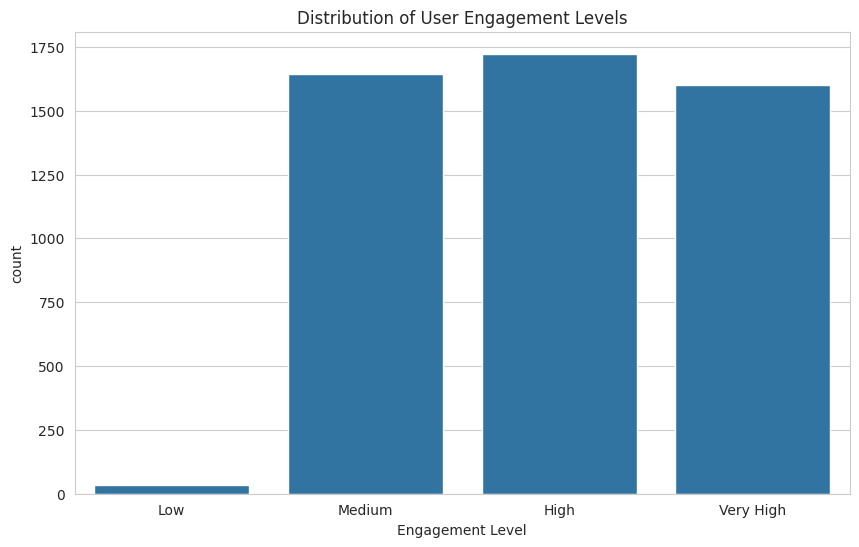

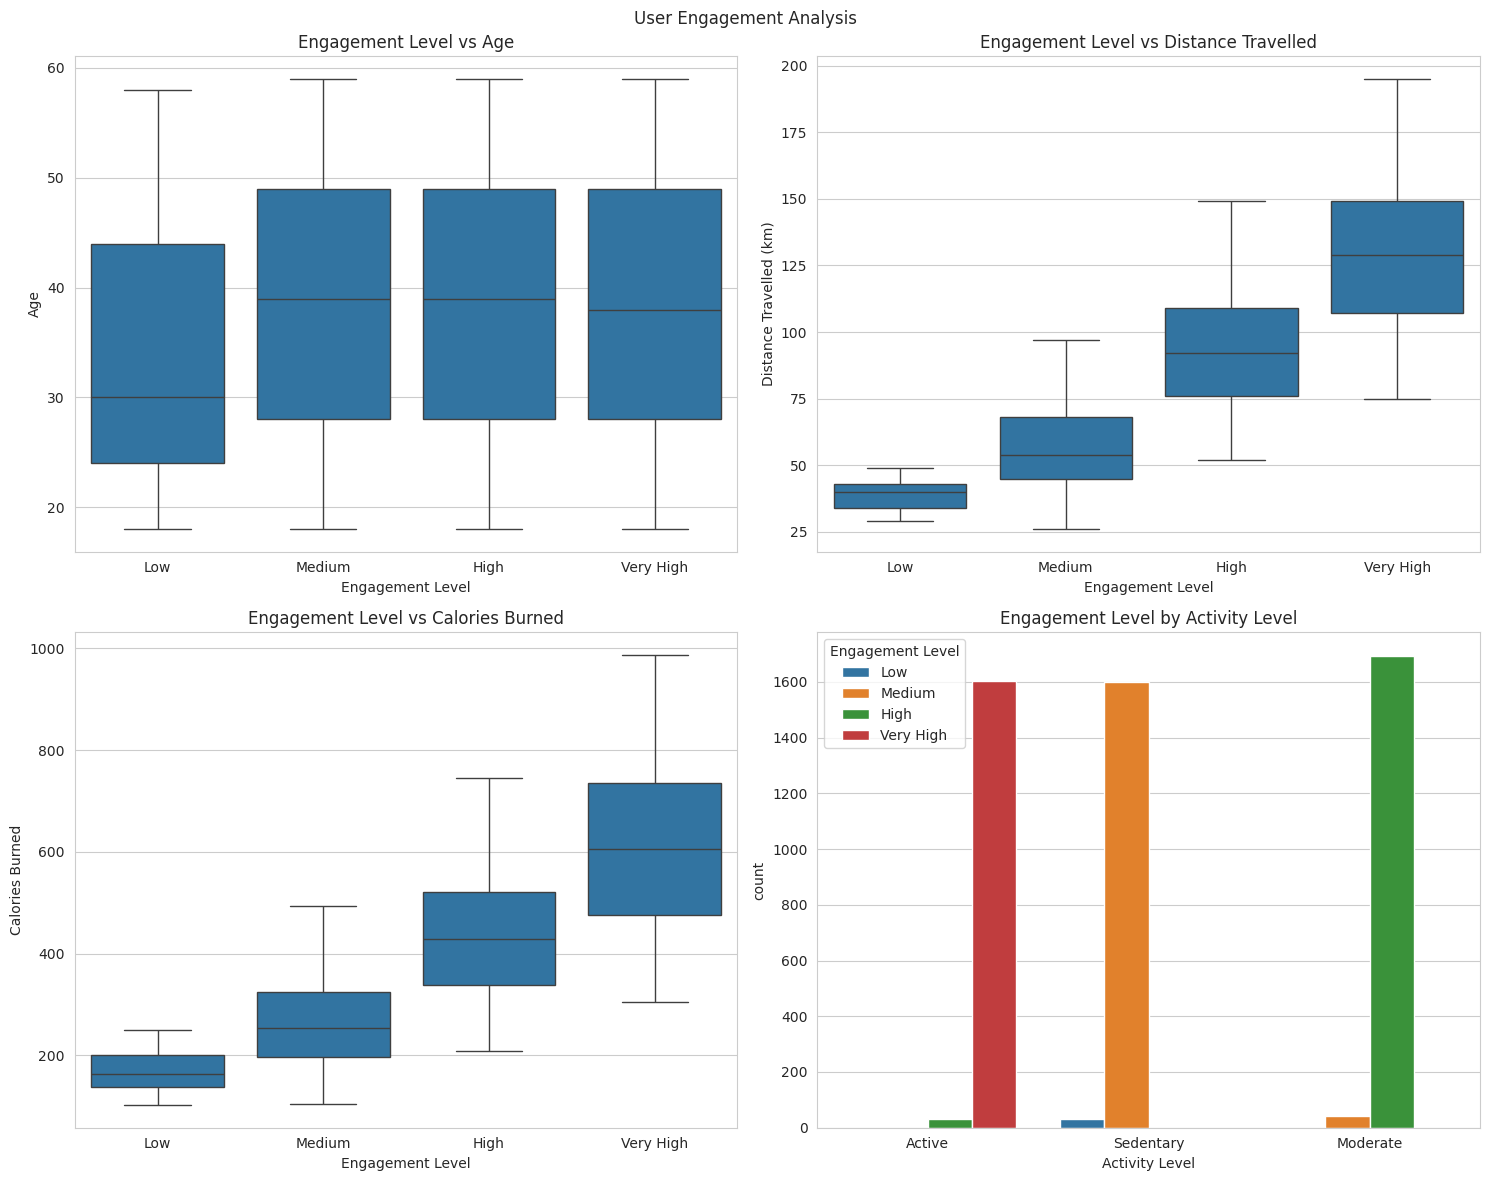

Average metrics by Engagement Level:
                        Age  Distance Travelled (km)  Calories Burned
Engagement Level                                                     
Low               33.272727                38.787879       169.727273
Medium            38.548112                56.588307       262.799635
High              38.569356                93.475334       435.706907
Very High         38.245318               129.523096       607.827091
Correlation between App Sessions and fitness metrics:
Distance Travelled (km)    0.857045
Calories Burned            0.795404
Name: App Sessions, dtype: float64


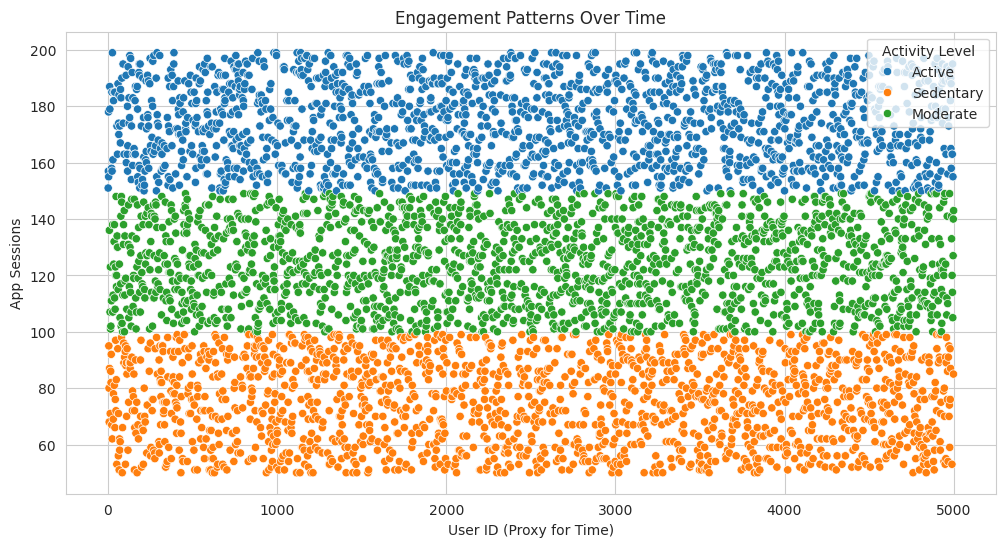

Top 10 Most Engaged Users:
      User ID  Gender  Age Activity Level  Location  App Sessions
25         26  Female   38         Active     Urban           199
289       290  Female   48         Active     Rural           199
389       390  Female   55         Active  Suburban           199
885       886    Male   26         Active     Urban           199
980       981  Female   51         Active  Suburban           199
994       995  Female   56         Active  Suburban           199
1117     1118    Male   33         Active     Urban           199
1139     1140  Female   26         Active     Urban           199
1301     1302  Female   29         Active     Rural           199
1922     1923  Female   25         Active     Rural           199


In [42]:
# Analyze engagement distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Engagement Level', data=df)
plt.title('Distribution of User Engagement Levels')
plt.show()

# Analyze engagement by user characteristics
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('User Engagement Analysis')

sns.boxplot(x='Engagement Level', y='Age', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Engagement Level vs Age')

sns.boxplot(x='Engagement Level', y='Distance Travelled (km)', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Engagement Level vs Distance Travelled')

sns.boxplot(x='Engagement Level', y='Calories Burned', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Engagement Level vs Calories Burned')

sns.countplot(x='Activity Level', hue='Engagement Level', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Engagement Level by Activity Level')
axes[1, 1].legend(title='Engagement Level')

plt.tight_layout()
plt.show()

# Calculate average metrics by engagement level
print("Average metrics by Engagement Level:")
print(df.groupby('Engagement Level')[['Age', 'Distance Travelled (km)', 'Calories Burned']].mean())

# Analyze correlation between engagement and fitness metrics
engagement_correlations = df[['App Sessions', 'Distance Travelled (km)', 'Calories Burned']].corr()['App Sessions'].drop('App Sessions')
print("Correlation between App Sessions and fitness metrics:")
print(engagement_correlations)

# Identify top engaged users
top_engaged = df.nlargest(10, 'App Sessions')
print("Top 10 Most Engaged Users:")
print(top_engaged[['User ID', 'Gender', 'Age', 'Activity Level', 'Location', 'App Sessions']])

In [ ]:
#Key Findings:
#Engagement Levels: Higher engagement levels correlate strongly with increased distance traveled and calories burned.
#Activity Levels: Active users tend to have higher engagement.
#Age Patterns: No clear age-related patterns in engagement.
#Top Engaged Users: Mostly active and female users.
#Recommendations:
#Personalized Features: Introduce personalized features for highly engaged users to maintain their interest.
#Activity Encouragement: Encourage sedentary and moderate users to become more active through targeted notifications and rewards.
#Location-Based Insights: Utilize location data to provide region-specific fitness challenges and activities.
#User Segmentation: Segment users based on engagement levels and tailor the app experience accordingly.
#This analysis provides a comprehensive overview of user engagement and app performance, helping to identify areas for improvement and potential enhancements.